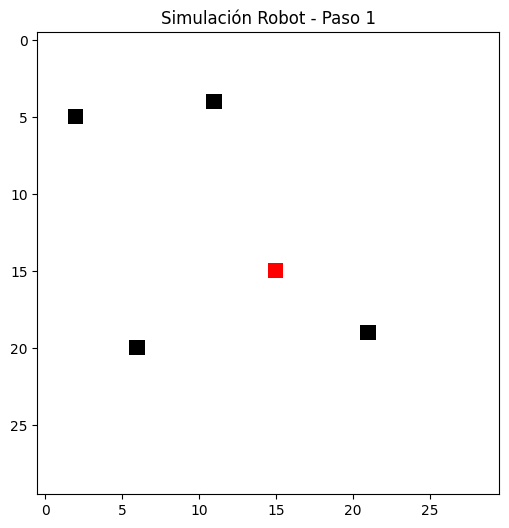

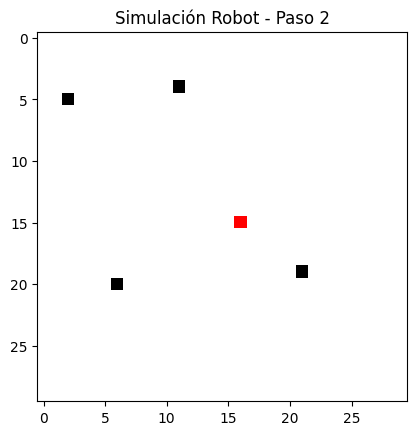

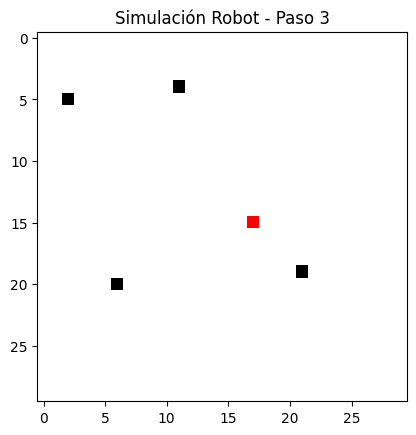

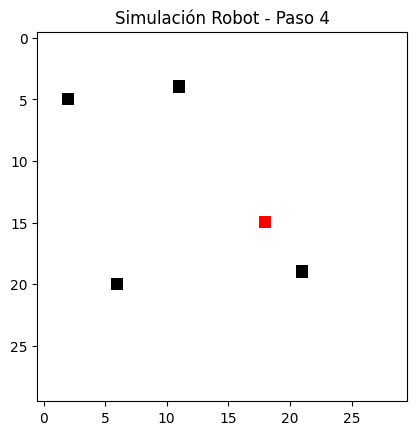

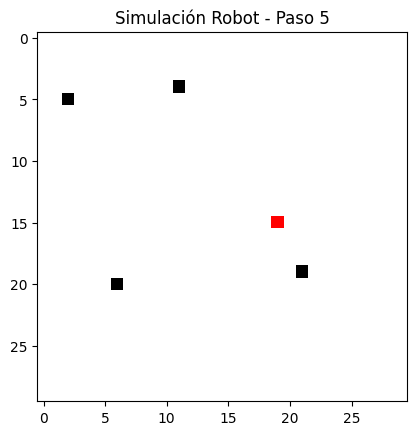

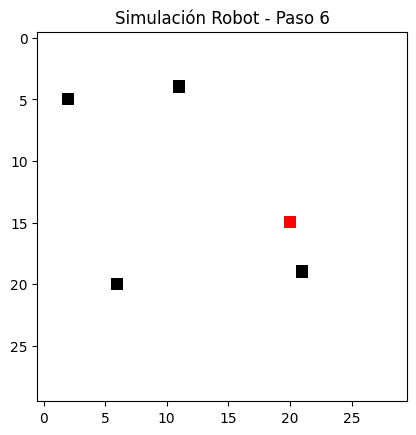

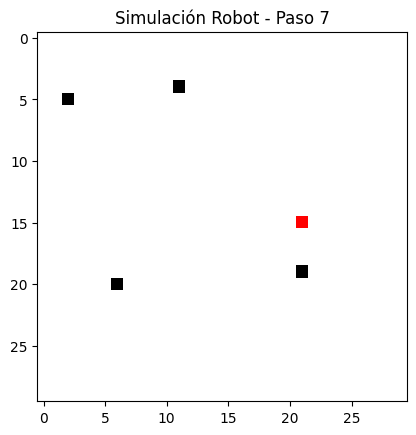

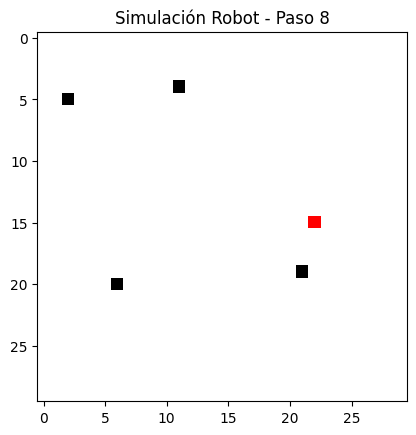

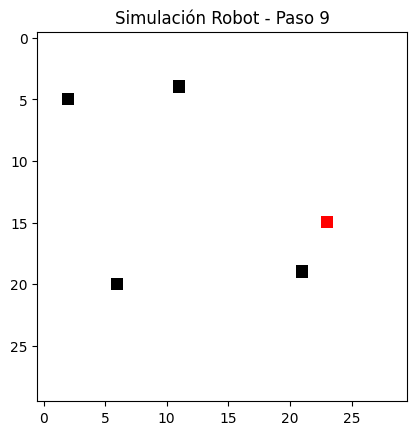

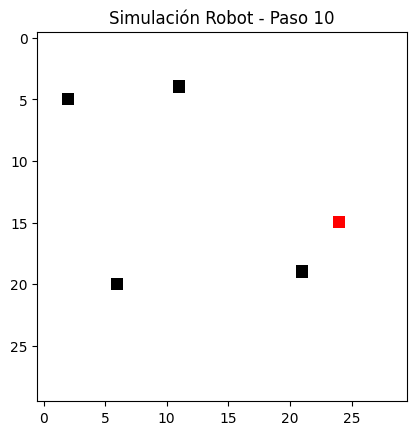

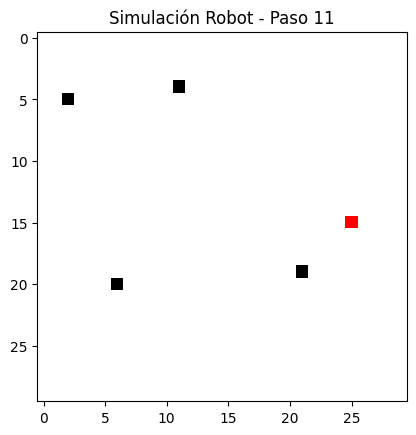

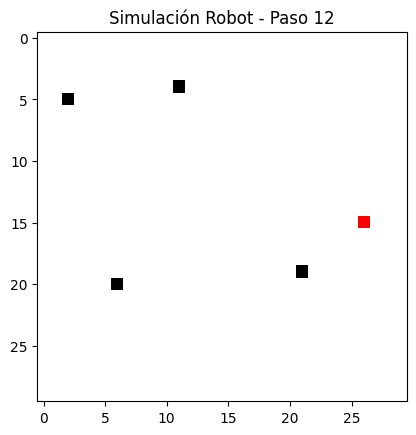

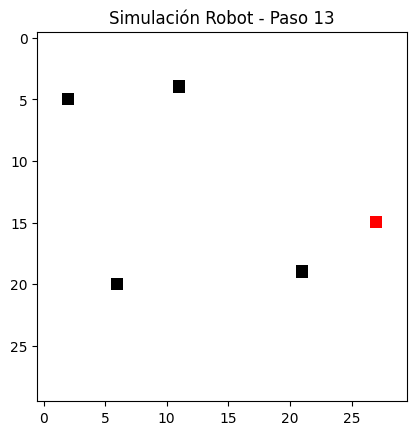

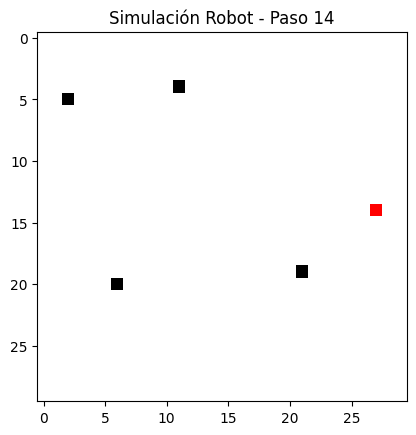

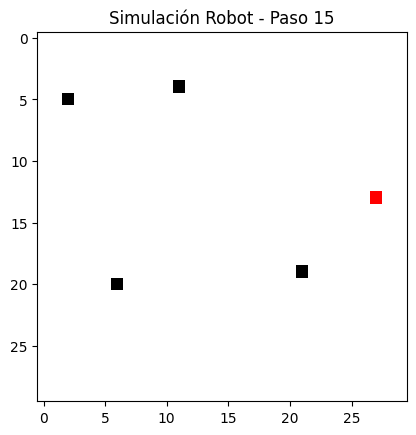

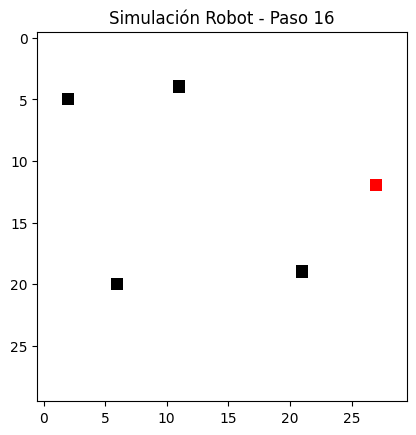

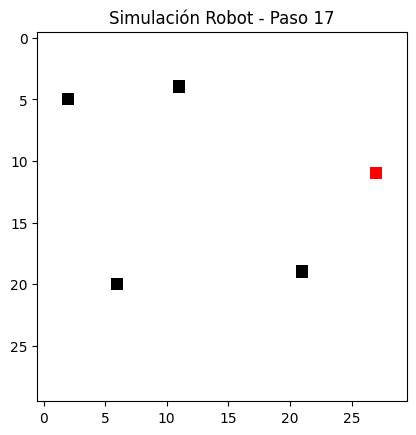

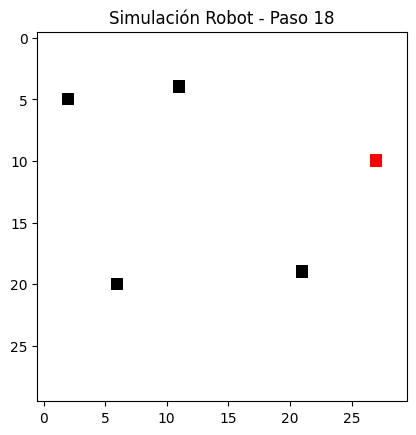

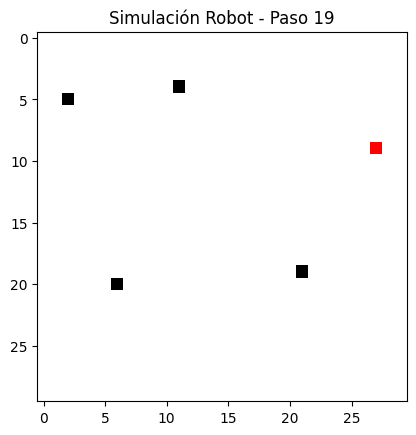

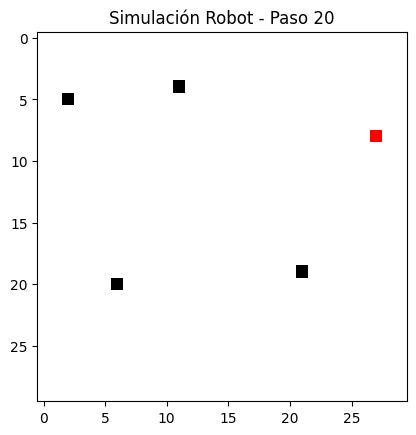

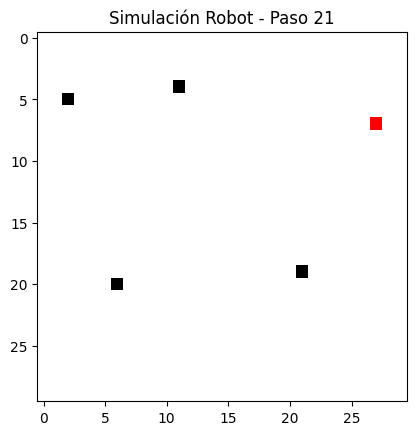

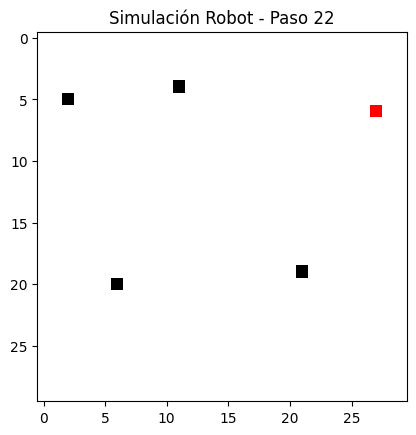

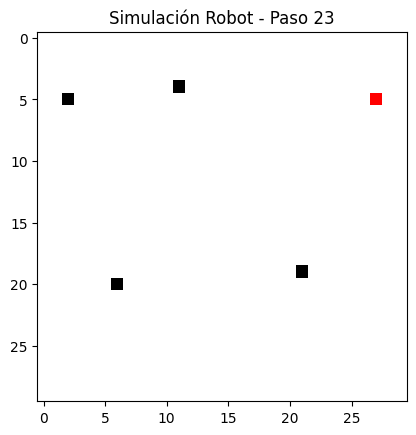

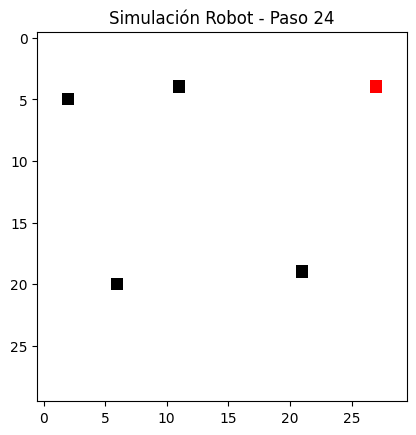

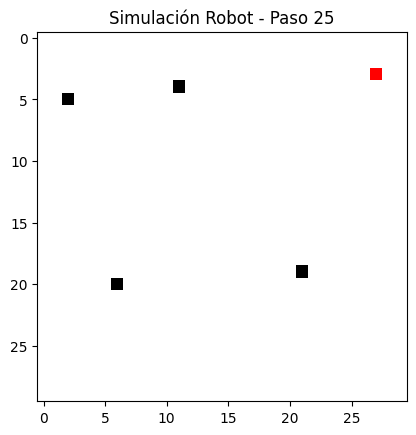

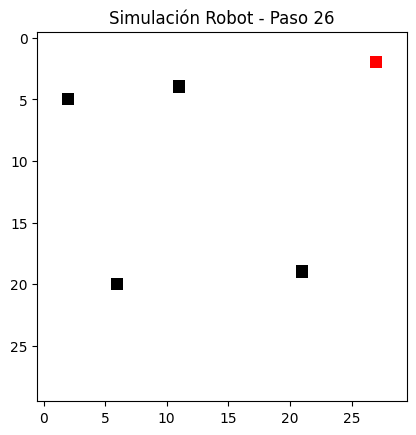

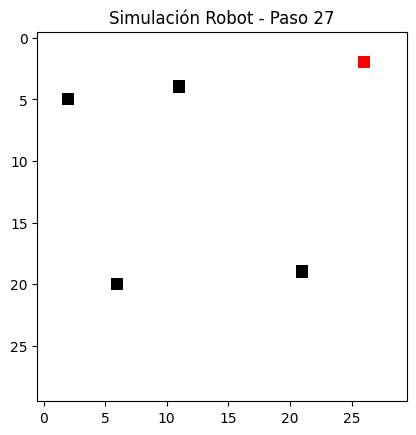

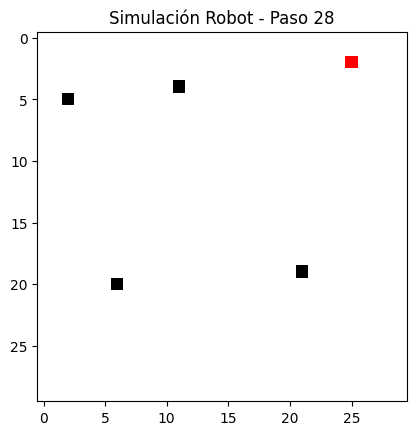

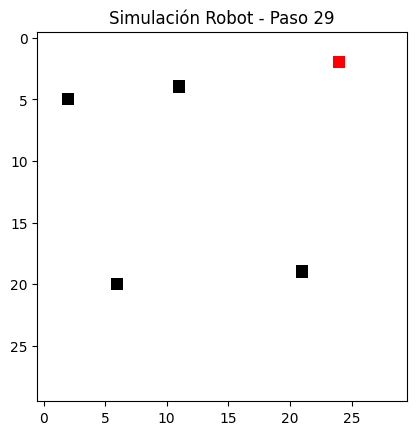

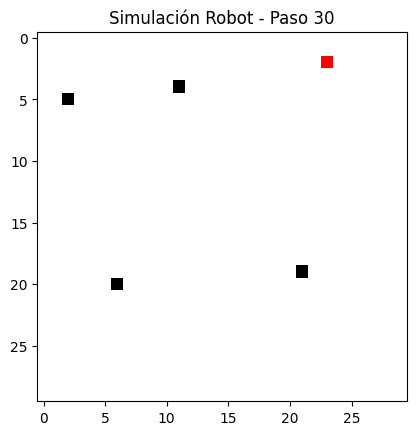

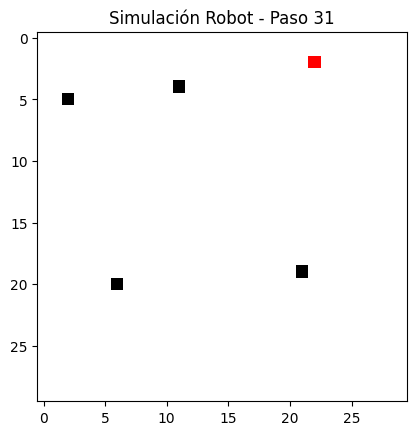

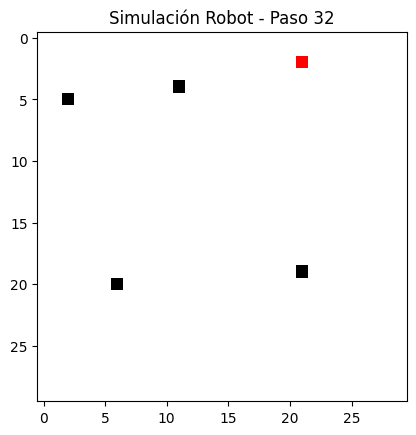

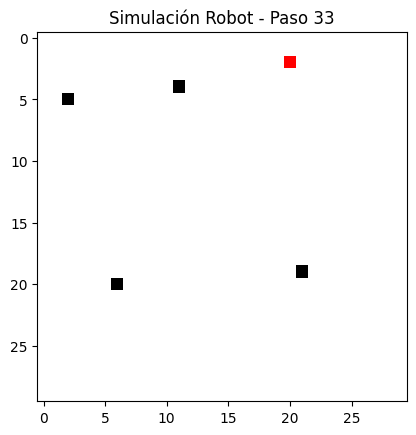

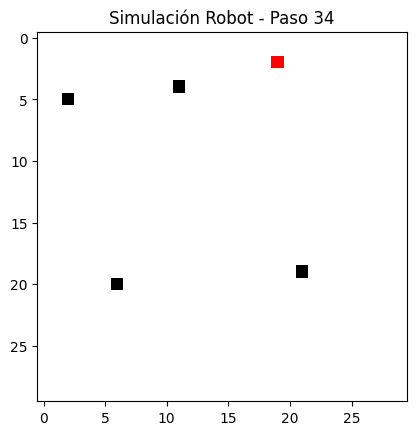

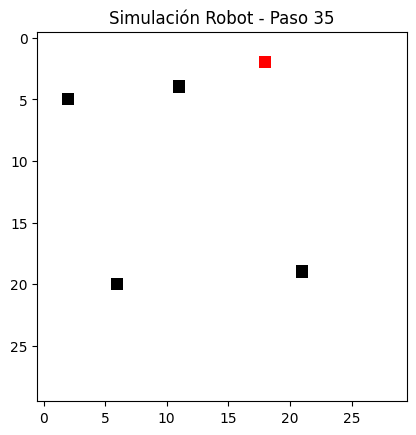

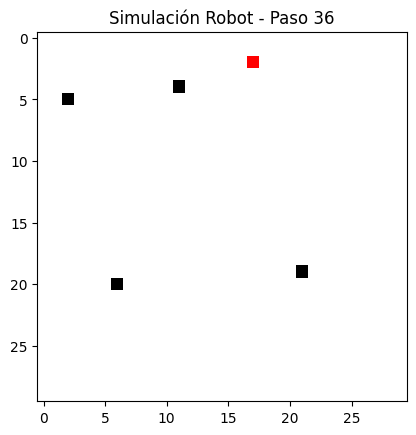

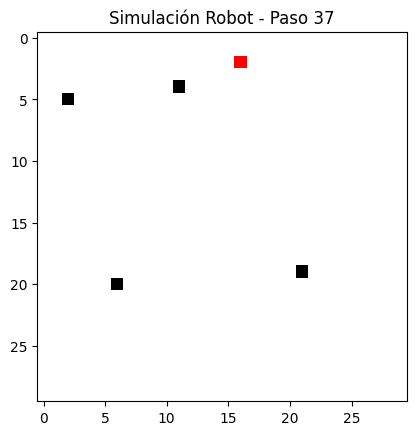

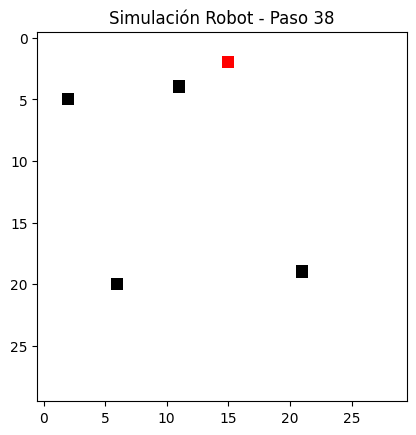

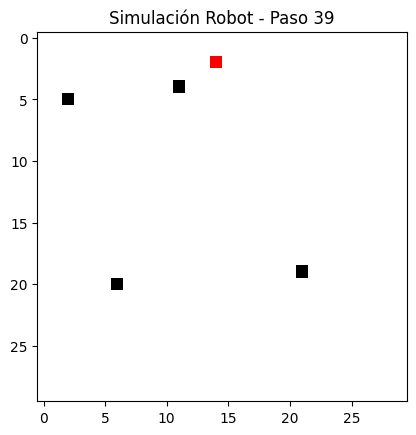

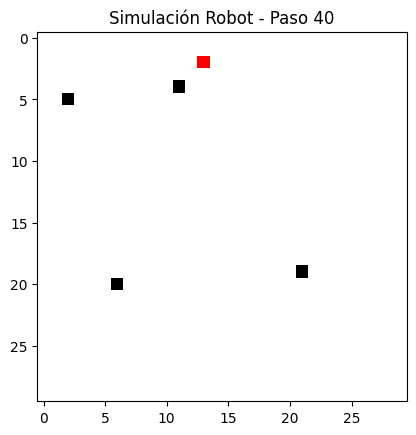

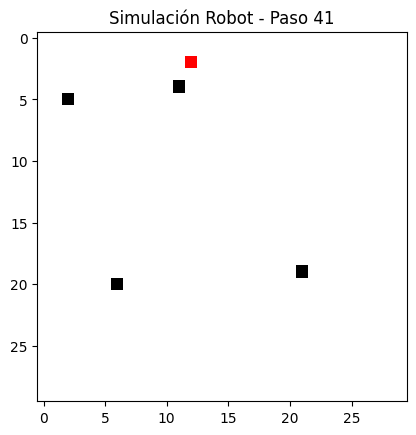

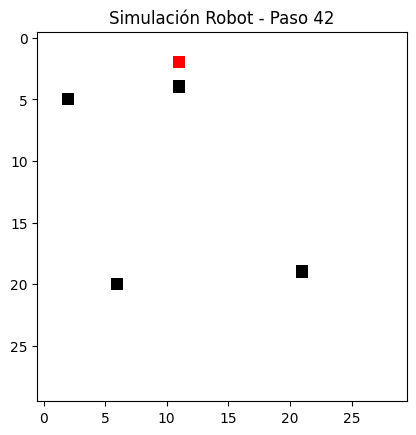

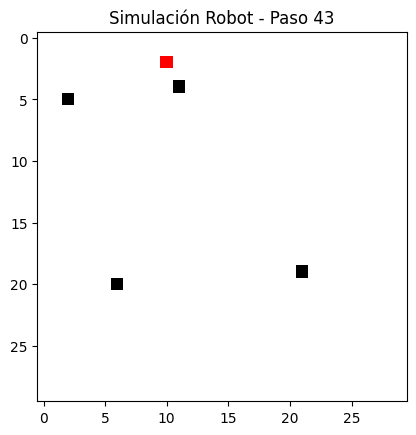

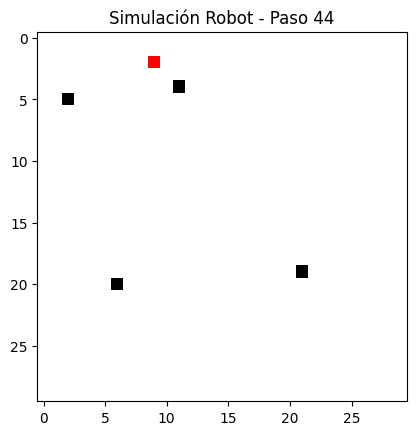

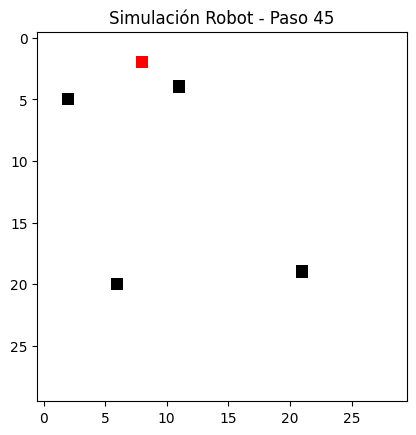

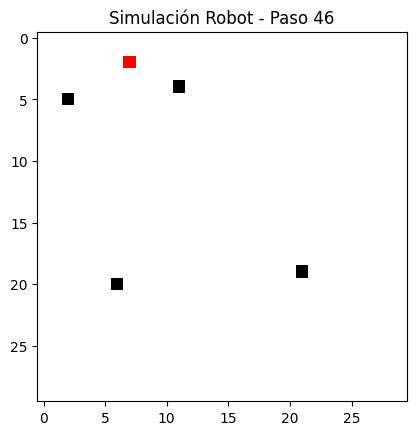

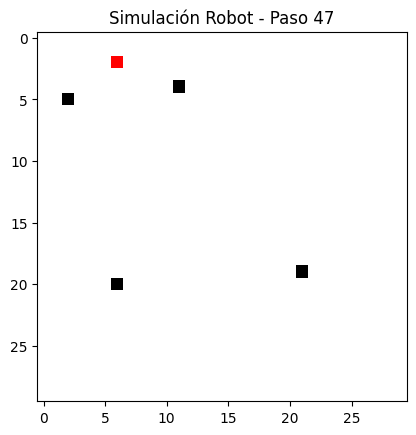

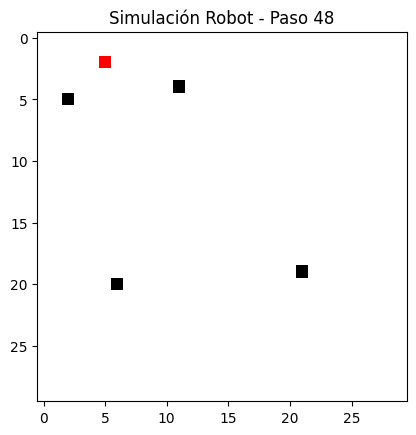

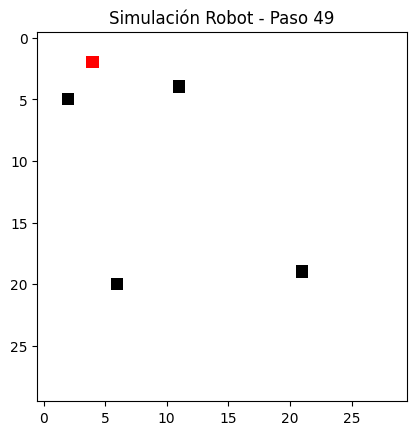

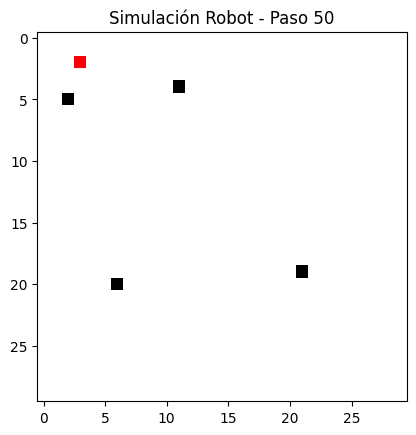

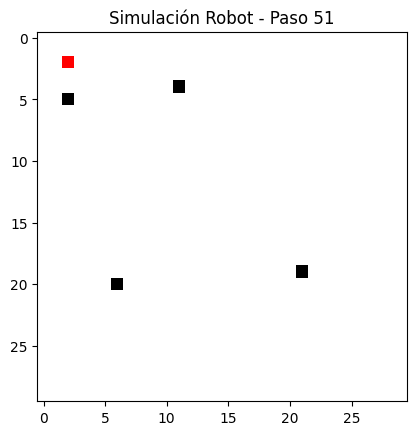

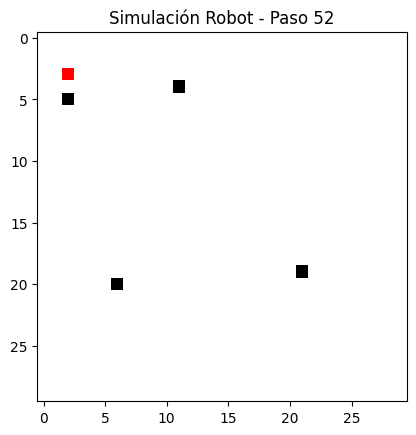

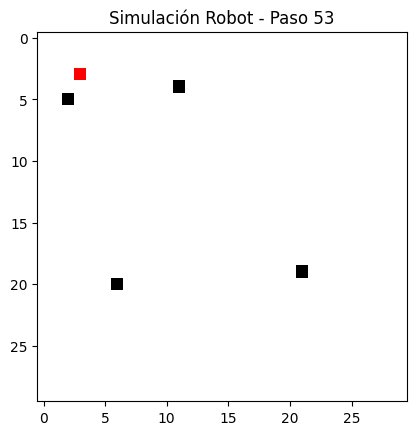

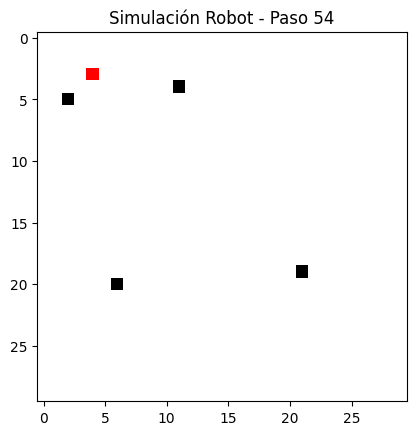

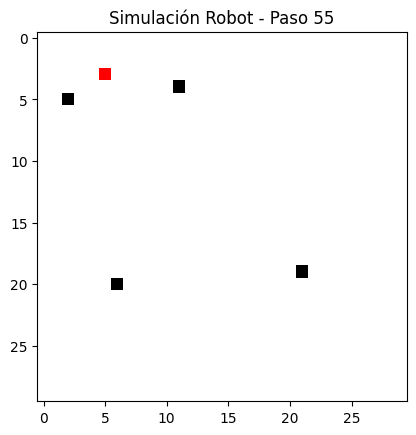

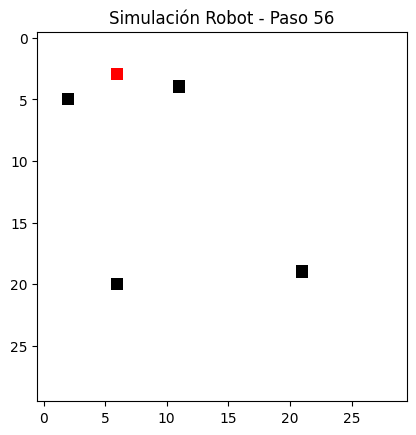

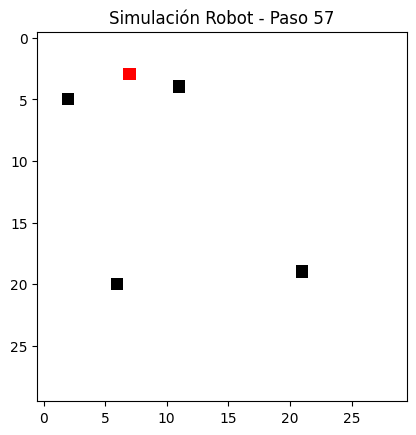

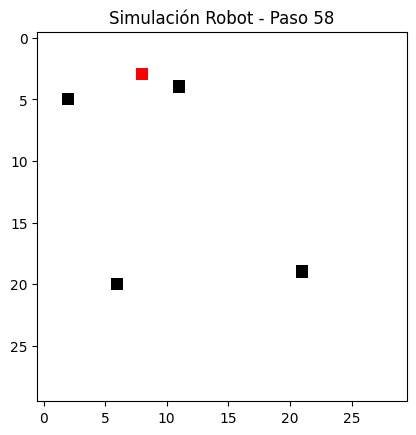

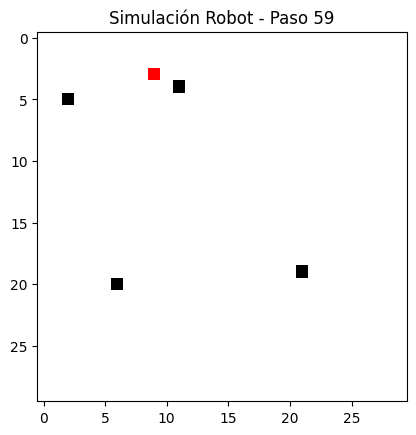

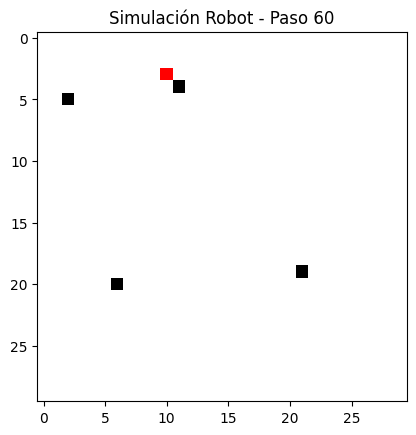

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

# Parámetros del entorno
SIZE = 30              # Aca va el tamaño de la grilla
OBJETOS = 4            # Aca pongo la cantidad de obstaculos
PASOS = 60             # cantidad de iteracion

# Códigos del mapa, estos son los estados
VACIO = 0
OBJETO = 1
ROBOT = 2

# Inicializar entorno
def crear_mapa(size, objetos):
    mapa = np.zeros((size, size), dtype=int)
    for _ in range(objetos):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        mapa[x, y] = OBJETO
    return mapa

# Medir distancia con un sensor en una dirección
def sensor_distancia(mapa, x, y, dx, dy):
    distancia = 0
    while 0 <= x+dx < SIZE and 0 <= y+dy < SIZE:
        x += dx
        y += dy
        distancia += 1
        if mapa[x, y] == OBJETO:
            break
    return distancia

# Rotar vector dirección
def rotar(direccion, angulo):
    dx, dy = direccion
    if angulo == 90:
        return dy, -dx
    elif angulo == -90:
        return -dy, dx
    return dx, dy

# Simulación del robot con evasión temprana
def simular_robot():
    mapa = crear_mapa(SIZE, OBJETOS)
    x, y = SIZE//2, SIZE//2
    direccion = (0, 1)  # inicia hacia la derecha

    #Aca pongo el esquema de colores
    cmap = ListedColormap(['white', 'black', 'red'])
    plt.figure(figsize=(6, 6))


    #Ciclos de los pasos
    for paso in range(PASOS):
        mapa_temp = mapa.copy()
        mapa_temp[x, y] = ROBOT

        # Sensores: Izquierda, frente, derecha
        sensores = []
        for angulo in [-90, 0, 90]:
            dx, dy = rotar(direccion, angulo)
            sensores.append(sensor_distancia(mapa, x, y, dx, dy))

        # Decisión: evitar obstáculos antes de chocar
        # Aca van los sensores, se asume que el objeto no retrocede
        # (seria muy facil moverlo en linea recta)
        frente = sensores[1]
        izquierda = sensores[0]
        derecha = sensores[2]

        if frente <= 2:  # Si un obstáculo está muy cerca al frente
            if izquierda > derecha:
                direccion = rotar(direccion, -90)
            elif derecha > izquierda:
                direccion = rotar(direccion, 90)
            else:
                # Si ambos lados están bloqueados, retrocedemos
                direccion = rotar(direccion, 180 if random.random() > 0.5 else -180)

        # Mover robot si hay espacio
        dx, dy = direccion
        if 0 <= x+dx < SIZE and 0 <= y+dy < SIZE and mapa[x+dx, y+dy] != OBJETO:
            x += dx
            y += dy
        else:
            # Si no hay espacio, giramos aleatoriamente
            direccion = rotar(direccion, 90 if random.random() > 0.5 else -90)

        # Visualización
        plt.clf()
        plt.imshow(mapa_temp, cmap=cmap, vmin=0, vmax=2)
        plt.title(f"Simulación Robot - Paso {paso+1}")
        plt.pause(0.3)

    plt.show()

# Ejecutar simulación
simular_robot()
